## t-test 연습

데이터 셋: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores

위 데이터 셋은 넷플릭스 오리지널 시리즈의 메타 데이터와 평점을 담은 데이터 셋입니다. 지금까지 배운 시각화와 통계 기법들을 활용하여 넷플릭스의 데이터 분석가가 되었다고 생각하고 데이터를 통해서 인사이트를 전달해보세요.

![image.png](attachment:56cb8dd8-2b04-4bd7-b7ac-b10facce351f.png)

## 요구 사항
- 기본적인 EDA와 시각화를 해주세요. 
- t-test 기법을 다양하게 사용해보세요.
- 통계적 근거를 활용하여 오리지널 시리즈 제작 방향에 대한 제언을 해보세요. 
- 결과물을 velog에 기록해주세요. (선택)

In [2]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("./data/NetflixOriginals.csv", encoding='latin1')

- 기본적인 EDA와 시각화를 해주세요. 

In [4]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [6]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [7]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [8]:
print(df['Genre'].unique())
len(df['Genre'].unique())

['Documentary' 'Thriller' 'Science fiction/Drama' 'Horror thriller'
 'Mystery' 'Action' 'Comedy' 'Heist film/Thriller'
 'Musical/Western/Fantasy' 'Drama' 'Romantic comedy' 'Action comedy'
 'Horror anthology' 'Political thriller' 'Superhero-Comedy' 'Horror'
 'Romance drama' 'Anime / Short' 'Superhero' 'Heist' 'Western'
 'Animation/Superhero' 'Family film' 'Action-thriller' 'Teen comedy-drama'
 'Romantic drama' 'Animation' 'Aftershow / Interview' 'Christmas musical'
 'Science fiction adventure' 'Science fiction' 'Variety show'
 'Comedy-drama' 'Comedy/Fantasy/Family' 'Supernatural drama'
 'Action/Comedy' 'Action/Science fiction' 'Romantic teenage drama'
 'Comedy / Musical' 'Musical' 'Science fiction/Mystery' 'Crime drama'
 'Psychological thriller drama' 'Adventure/Comedy' 'Black comedy'
 'Romance' 'Horror comedy' 'Christian musical' 'Romantic teen drama'
 'Family' 'Dark comedy' 'Comedy horror' 'Psychological thriller' 'Biopic'
 'Science fiction/Thriller' 'Mockumentary' 'Satire' 'One-man s

115

In [9]:
df['Genres'] = df['Genre'].str.split('/').apply(lambda genres: [genre.strip().lower() for genre in genres])

df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('science fiction', 'sci_fi') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('musicial', 'musical') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('making-of', 'making_of') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('romantic', 'romance') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('biopic', 'biographical') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('black comedy', 'dark_comedy') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('dark comedy', 'dark_comedy') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('mentalism special', 'supernatural') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('one-man show', 'one_man_show') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('stop motion', 'stop_motion') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('teen ', 'teenage ') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('hidden-camera prank ', '') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('coming-of-age', 'coming_of_age') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('variety show', 'variety_show') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('animated', 'animation') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace('anime', 'animation') for genre in genres])
df['Genres'] = df['Genres'].apply(lambda genres: [genre.replace(' film', '') for genre in genres])

df['Genres'] = df['Genres'].apply(lambda genres: [word for genre in genres for word in genre.split('-')])
df['Genres'] = df['Genres'].apply(lambda genres: [word for genre in genres for word in genre.split(' ')])

unique_genres = sorted(df['Genres'].explode().unique())
num_unique_genres = len(unique_genres)

print(num_unique_genres)
print(unique_genres)

47
['action', 'adventure', 'aftershow', 'animation', 'anthology', 'biographical', 'christian', 'christmas', 'comedy', 'coming_of_age', 'concert', 'crime', 'dance', 'dark_comedy', 'documentary', 'drama', 'epic', 'family', 'fantasy', 'heist', 'historical', 'holiday', 'horror', 'interview', 'making_of', 'mockumentary', 'musical', 'mystery', 'one_man_show', 'political', 'psychological', 'romance', 'satire', 'sci_fi', 'short', 'sports', 'spy', 'stop_motion', 'superhero', 'supernatural', 'teenage', 'thriller', 'urban', 'variety_show', 'war', 'western', 'zombie']


In [10]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Genres
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,[documentary]
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,[thriller]
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,"[sci_fi, drama]"
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,"[horror, thriller]"
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,[mystery]


In [11]:
# 장르 컬럼을 펼쳐서 개별 장르를 포함한 새로운 데이터프레임 생성
expanded_df = df.explode('Genres')

# 장르별로 그룹화하고 평균 평점 계산
genre_avg_scores = expanded_df.groupby('Genres')['IMDB Score'].mean()

# 평균 평점을 기준으로 내림차순 정렬
sorted_genre_avg_scores = genre_avg_scores.sort_values(ascending=False)

# 정렬된 결과 출력
print(sorted_genre_avg_scores.head())

Genres
concert          7.633333
making_of        7.450000
coming_of_age    7.200000
one_man_show     7.133333
historical       7.050000
Name: IMDB Score, dtype: float64


IMDB Score 는 유저들의 기반으로 만들어진 사이트입니다 평론가들의 평가한것이 아니기 때문에 이 정보는 부적절할수 있습니다 
=============

In [12]:
df['Genre_combinations'] = df['Genres'].apply(lambda genres: '/'.join(sorted(genres)))
genre_avg_scores = df.groupby('Genre_combinations').agg({'IMDB Score': 'mean', 'Title': 'count'})
genre_avg_scores = genre_avg_scores.rename(columns={'Title': 'Movie Count'})
genre_avg_scores = genre_avg_scores.sort_values(by='IMDB Score', ascending=False)

for index, row in genre_avg_scores.head().iterrows():
    genre_combination = index
    avg_score = row['IMDB Score']
    movie_count = int(row['Movie Count'])
    movies = df[df['Genre_combinations'] == genre_combination]

    print(f'장르: {genre_combination}\n평균 평점: {avg_score:.2f} | 편수: {movie_count}')
    print('-' * 40)
    for _, movie in movies.iterrows():
        movie_title = movie['Title']
        movie_score = movie['IMDB Score']
        print('-', movie_title, f'({movie_score:.2f})')
    print('\n')

장르: adventure/animation/christmas/comedy
평균 평점: 8.20 | 편수: 1
----------------------------------------
- Klaus (8.20)


장르: musical/short
평균 평점: 7.70 | 편수: 1
----------------------------------------
- Anima (7.70)


장르: concert
평균 평점: 7.63 | 편수: 6
----------------------------------------
- Ariana Grande: Excuse Me, I Love You (6.40)
- Shawn Mendes: Live in Concert (7.40)
- Barbra: The Music, The Mem'ries, The Magic! (7.50)
- Justin Timberlake + The Tennessee Kids (7.70)
- Ben Platt: Live from Radio City Music Hall (8.40)
- Taylor Swift: Reputation Stadium Tour (8.40)


장르: anthology/dark_comedy
평균 평점: 7.60 | 편수: 1
----------------------------------------
- Ludo (7.60)


장르: making_of
평균 평점: 7.45 | 편수: 2
----------------------------------------
- The Road to El Camino: A Breaking Bad Movie (7.20)
- Road to Roma (7.70)




Levene Statistic (Squared Data): 1.3496923534300898
P-Value (Squared Data): 0.24580812244645256
Equal Variance T-Test
T-Statistic (Squared Data): 3.760767950942394
P-Value (Squared Data): 0.00018651509348783713
English Mean Score: 6.38004987531172
Non-English Mean Score: 6.034426229508198


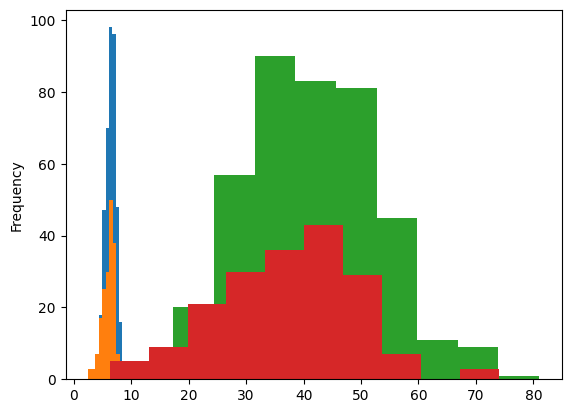

In [13]:
from scipy import stats
import numpy as np

# English 언어인 경우와 그렇지 않은 경우의 평점 추출
english_scores = df[df['Language'] == 'English']['IMDB Score']
non_english_scores = df[df['Language'] != 'English']['IMDB Score']

english_scores.plot(kind="hist")
non_english_scores.plot(kind="hist")

import numpy as np
np.square(english_scores).plot(kind="hist")
np.square(non_english_scores).plot(kind="hist")

# 평균 평점 계산
english_mean = english_scores.mean()
non_english_mean = non_english_scores.mean()

# 스퀘어 변환 적용
english_scores_squared = np.square(english_scores)
non_english_scores_squared = np.square(non_english_scores)

# Levene's test 수행
statistic, p_value = stats.levene(english_scores_squared, non_english_scores_squared)

# 결과 출력
print('Levene Statistic (Squared Data):', statistic)
print('P-Value (Squared Data):', p_value)

# 등분산성 가정이 성립하는 경우
if p_value > 0.05:
    # 등분산성 가정하고 t-test 수행
    t_statistic, t_p_value = stats.ttest_ind(english_scores_squared, non_english_scores_squared, equal_var=True)
    print('Equal Variance T-Test')
    print('T-Statistic (Squared Data):', t_statistic)
    print('P-Value (Squared Data):', t_p_value)
else:
    # 등분산성 가정하지 않고 t-test 수행
    t_statistic, t_p_value = stats.ttest_ind(english_scores_squared, non_english_scores_squared, equal_var=False)
    print('Welch\'s T-Test')
    print('T-Statistic (Squared Data):', t_statistic)
    print('P-Value (Squared Data):', t_p_value)

# 평균 평점 출력
print('English Mean Score:', english_mean)
print('Non-English Mean Score:', non_english_mean)

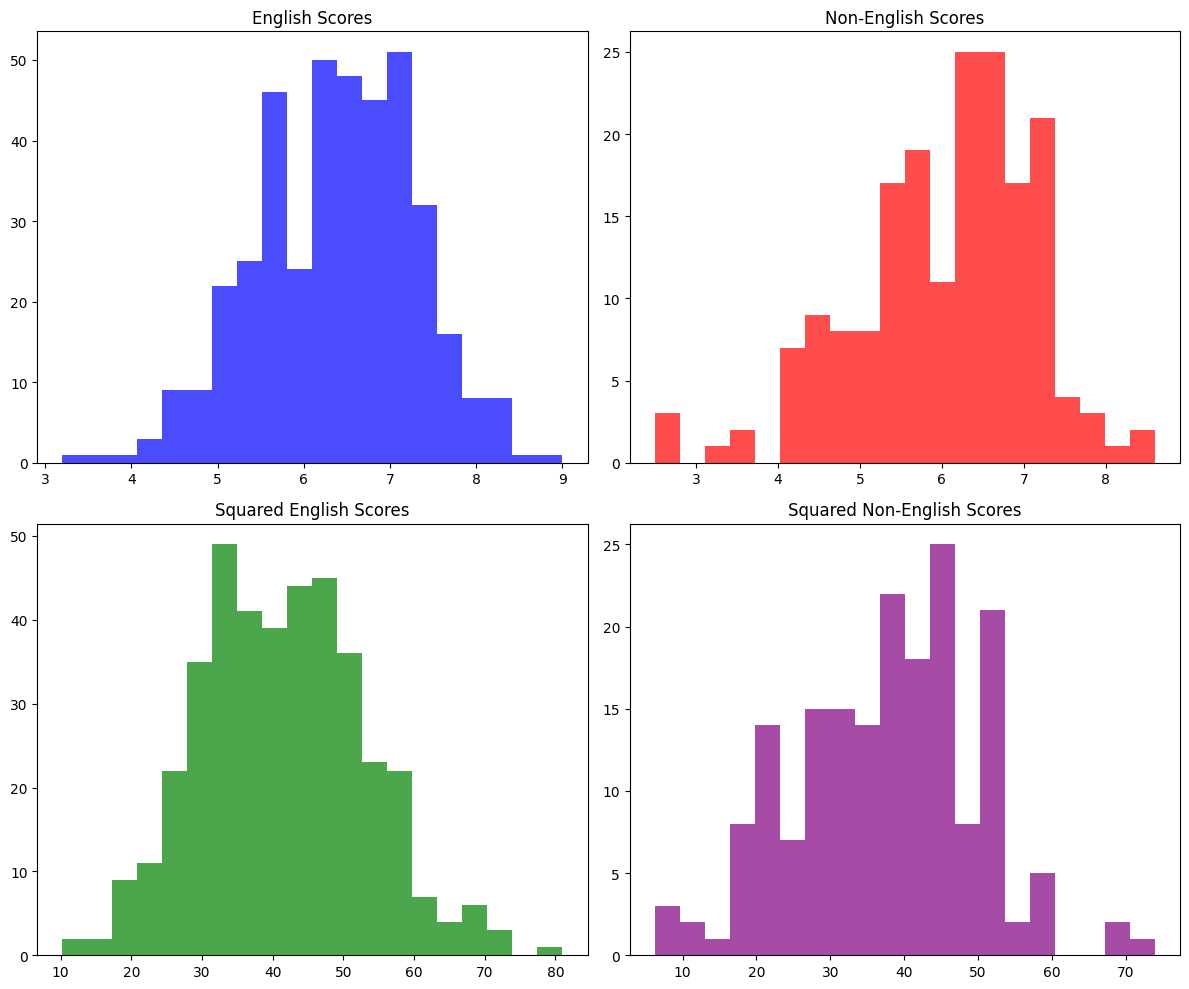

Levene Statistic (Squared Data): 1.3496923534300898
P-Value (Squared Data): 0.24580812244645256
Equal Variance T-Test
T-Statistic (Squared Data): 3.760767950942394
P-Value (Squared Data): 0.00018651509348783713
English Mean Score: 6.38004987531172
Non-English Mean Score: 6.034426229508198


In [14]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# English 언어인 경우와 그렇지 않은 경우의 평점 추출
english_scores = df[df['Language'] == 'English']['IMDB Score']
non_english_scores = df[df['Language'] != 'English']['IMDB Score']

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting on different subplots
axs[0, 0].hist(english_scores, bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('English Scores')
axs[0, 1].hist(non_english_scores, bins=20, color='red', alpha=0.7)
axs[0, 1].set_title('Non-English Scores')
axs[1, 0].hist(np.square(english_scores), bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Squared English Scores')
axs[1, 1].hist(np.square(non_english_scores), bins=20, color='purple', alpha=0.7)
axs[1, 1].set_title('Squared Non-English Scores')

plt.tight_layout()
plt.show()

# 평균 평점 계산
english_mean = english_scores.mean()
non_english_mean = non_english_scores.mean()

# 스퀘어 변환 적용
english_scores_squared = np.square(english_scores)
non_english_scores_squared = np.square(non_english_scores)

# Levene's test 수행
statistic, p_value = stats.levene(english_scores_squared, non_english_scores_squared)

# 결과 출력
print('Levene Statistic (Squared Data):', statistic)
print('P-Value (Squared Data):', p_value)

# 등분산성 가정이 성립하는 경우
if p_value > 0.05:
    # 등분산성 가정하고 t-test 수행
    t_statistic, t_p_value = stats.ttest_ind(english_scores_squared, non_english_scores_squared, equal_var=True)
    print('Equal Variance T-Test')
    print('T-Statistic (Squared Data):', t_statistic)
    print('P-Value (Squared Data):', t_p_value)
else:
    # 등분산성 가정하지 않고 t-test 수행
    t_statistic, t_p_value = stats.ttest_ind(english_scores_squared, non_english_scores_squared, equal_var=False)
    print('Welch\'s T-Test')
    print('T-Statistic (Squared Data):', t_statistic)
    print('P-Value (Squared Data):', t_p_value)

# 평균 평점 출력
print('English Mean Score:', english_mean)
print('Non-English Mean Score:', non_english_mean)


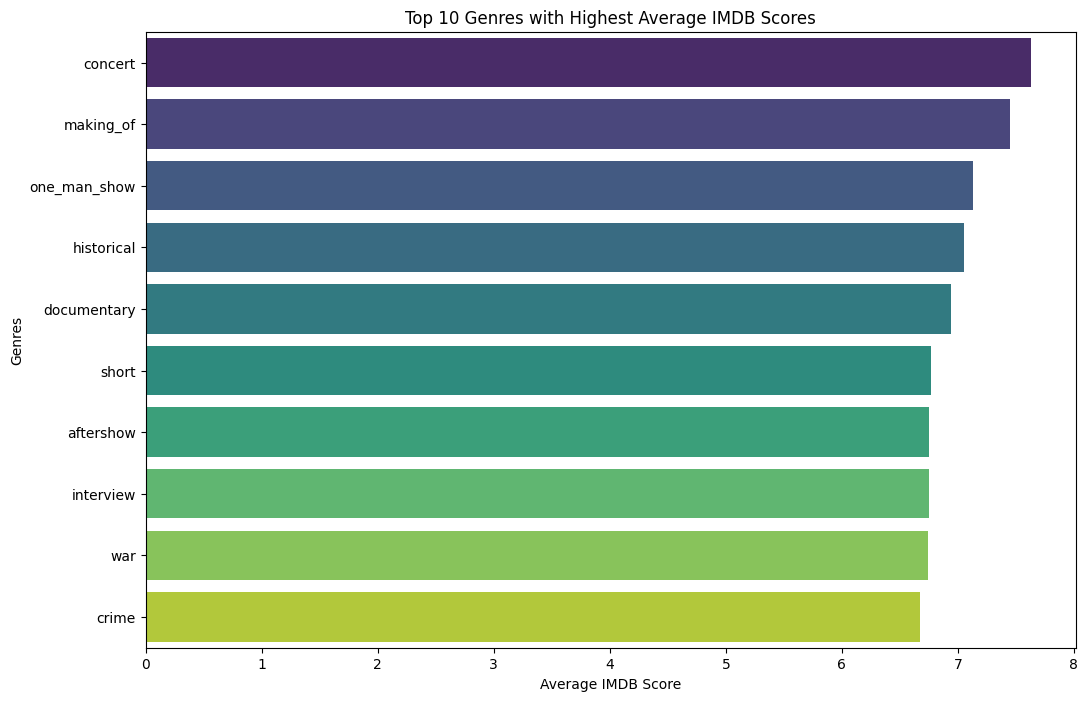

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 장르 컬럼을 펼쳐서 개별 장르를 포함한 새로운 데이터프레임 생성
expanded_df = df.explode('Genres')

# 장르별로 그룹화하고 영화 개수(count)와 평균 평점(mean) 계산
genre_stats = expanded_df.groupby('Genres')['IMDB Score'].agg(['count', 'mean'])

# 평균 평점을 기준으로 내림차순 정렬
sorted_genre_stats = genre_stats[genre_stats['count'] >= 2].sort_values(by='mean', ascending=False)

# 상위 10개 장르 선택
top_10_genres = sorted_genre_stats.head(10)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='mean', y=top_10_genres.index, data=top_10_genres, palette='viridis')
plt.xlabel('Average IMDB Score')
plt.ylabel('Genres')
plt.title('Top 10 Genres with Highest Average IMDB Scores')
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# 장르 컬럼을 펼쳐서 개별 장르를 포함한 새로운 데이터프레임 생성
expanded_df = df.explode('Genres')

# 장르별로 그룹화하고 영화 개수(count)와 평균 평점(mean) 계산
genre_stats = expanded_df.groupby('Genres')['IMDB Score'].agg(['count', 'mean'])

# 카운트가 가장 많은 상위 10개 장르 선택 후 평점을 기준으로 내림차순 정렬
sorted_genre_stats = genre_stats.sort_values(by='count', ascending=False).head(10).sort_values(by='count', ascending=False)


In [16]:
결국 인기가 많은건 콘서트 매이킹 필름 원맨쇼 역사 인데 큰 틀에서 보면 아래 에프터쇼 
, 인터뷰 같은것도 인기가 많았습니다

SyntaxError: invalid syntax (1504504714.py, line 1)

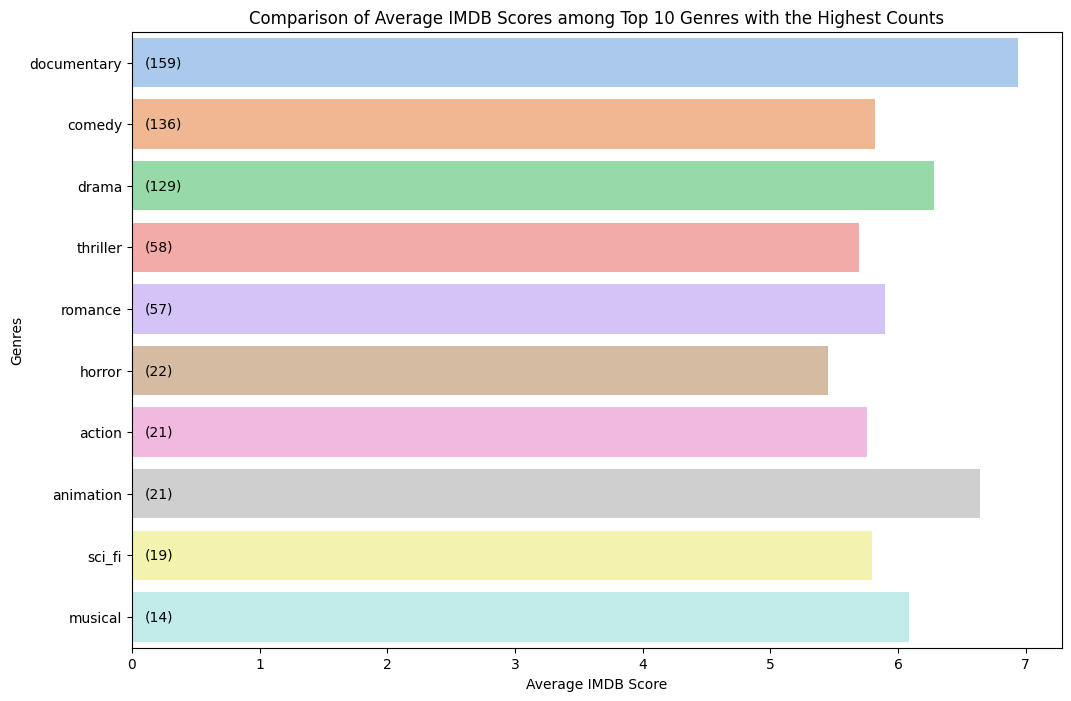

In [17]:

# 시각화
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='mean', y=sorted_genre_stats.index, data=sorted_genre_stats, palette='pastel')

# 눈금에 카운트 수 추가
for i, genre in enumerate(sorted_genre_stats.index):
    count = sorted_genre_stats.loc[genre, 'count']
    ax.text(0.1, i, f'({count})', va='center')

plt.xlabel('Average IMDB Score')
plt.ylabel('Genres')
plt.title('Comparison of Average IMDB Scores among Top 10 Genres with the Highest Counts')
plt.show()

# 저희의 귀무가설은 영화 개봉 요일이 스코어와의 유의미한 관계가 없다.' 이며
# 대립가설은 '개봉 요일과 스코어와의 유의미한 관계가 있다.' 이라 라고 생각 했습니다


In [35]:
#"Premiere" 열을 datetime 형태로 변환

df["Premiere"] = pd.to_datetime(df["Premiere"])


ShapiroResult(statistic=0.9967424273490906, pvalue=0.6371839642524719)
ShapiroResult(statistic=0.9908356666564941, pvalue=0.23276342451572418)
0.006451307976207792 
등분산성을 만족하지 않는다.
귀무가설은 '개봉 요일과 스코어와의 유의미한 관계가 없다.'이며,
대립가설은 '개봉 요일과 스코어와의 유의미한 관계가 있다.'이다.
0.06662449350707168 귀무가설을 채택한다.


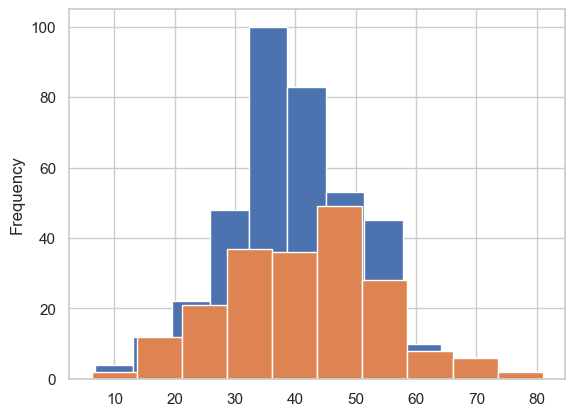

In [48]:
import numpy as np

friday = df[df["Premiere"].dt.day_name()=="Friday"]["IMDB Score"]
other = df[df["Premiere"].dt.day_name()!="Friday"]["IMDB Score"]

square_friday = np.square(friday)
square_friday.plot(kind="hist")
square_other = np.square(other)
square_other.plot(kind="hist")

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind

print(shapiro(square_friday))
print(shapiro(square_other))

s,p = levene(square_friday, square_other)
if p > 0.05:
    print(p, "\n등분산성을 만족한다.")
else:
    print(p, "\n등분산성을 만족하지 않는다.")
print("귀무가설은 '개봉 요일과 스코어와의 유의미한 관계가 없다.'이며,\n대립가설은 '개봉 요일과 스코어와의 유의미한 관계가 있다.'이다.")
_, p_value = ttest_ind(square_friday, square_other, alternative="two-sided", equal_var=False)

if p_value > 0.05:
    print(p_value, "귀무가설을 채택한다.")
else:
    print(p_value, "대립가설을 채택한다.")

<Axes: ylabel='Frequency'>

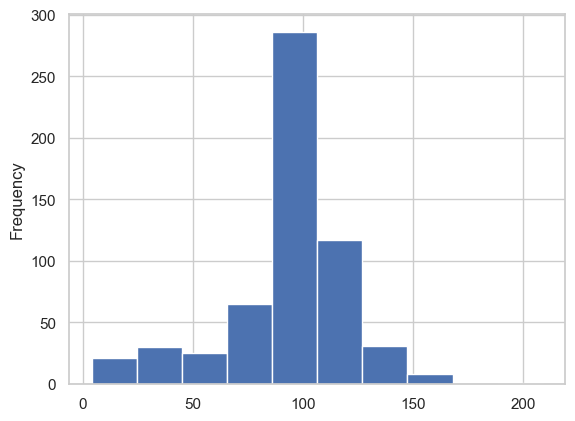

In [46]:
df['Runtime'].corr(df['IMDB Score'])
df['Runtime'].plot(kind='hist')

In [41]:
from scipy import stats

alpha = 0.05  # 유의수준 설정


# 'Runtime'이 90 이상에서 110인 영화들과 그 외 시간대의 영화들을 나누어 그룹 생성
group_high_runtime = df[(df['Runtime'] >= 90) & (df['Runtime'] <= 110)]
group_other_runtime = df[(df['Runtime'] < 90) | (df['Runtime'] > 110)]

# 각 그룹의 'IMDB Score' 추출
scores_high_runtime = group_high_runtime['IMDB Score']
scores_other_runtime = group_other_runtime['IMDB Score']


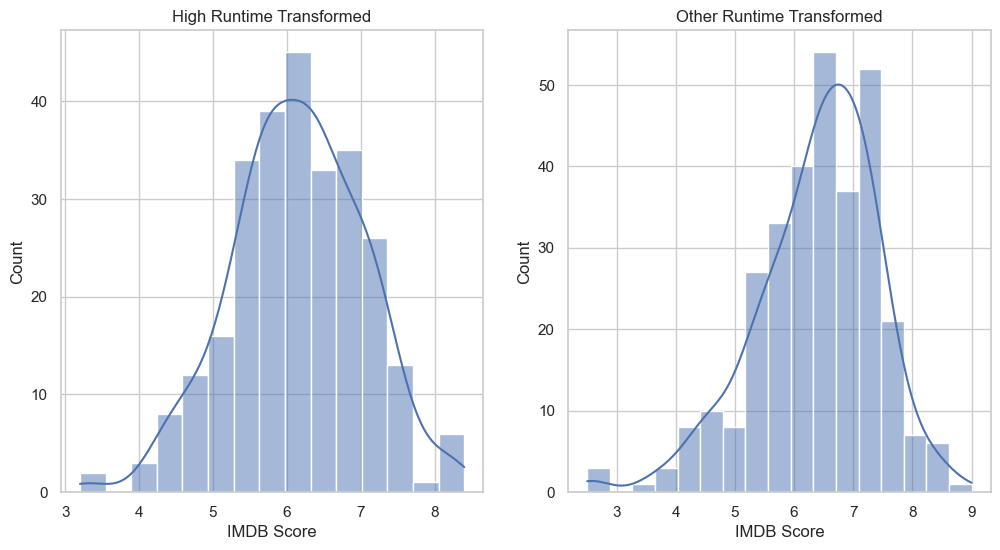

In [42]:
# 각 그룹의 'IMDB Score' 시각화

import numpy as np

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.histplot(scores_high_runtime, kde=True)
plt.title('High Runtime Transformed')

plt.subplot(1, 2, 2)
sns.histplot(scores_other_runtime, kde=True)
plt.title('Other Runtime Transformed')

plt.show()



In [43]:

# 등분산성 검정
_, p_value_levene = stats.levene(scores_high_runtime, scores_other_runtime)

if p_value_levene < alpha:
    print("두 그룹은 등분산성을 만족하지 않습니다.")
    t_statistic, p_value_ttest = stats.ttest_ind(scores_high_runtime, scores_other_runtime,equal_var=False)
else:
    print("두 그룹은 등분산성을 만족합니다.")
    t_statistic, p_value_ttest = stats.ttest_ind(scores_high_runtime, scores_other_runtime,equal_var=True)



# one-tailed test
if t_statistic > 0:
    p_value_one_tailed = p_value_ttest / 2
else:
    p_value_one_tailed = 1 - p_value_ttest / 2

if p_value_one_tailed < alpha:
    print("귀무가설을 기각합니다.")
    print("Runtime이 90 이상에서 110인 영화들의 IMDB Score가 그 외 시간대 영화들보다 높다는 통계적으로 유의한 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다.")
    print("Runtime이 90 이상에서 110인 영화들의 IMDB Score와 그 외 시간대 영화들의 IMDB Score 간에는 통계적으로 유의한 차이가 없습니다.")


두 그룹은 등분산성을 만족합니다.
귀무가설을 채택합니다.
Runtime이 90 이상에서 110인 영화들의 IMDB Score와 그 외 시간대 영화들의 IMDB Score 간에는 통계적으로 유의한 차이가 없습니다.
